# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 10:
Image - Min Value: 24 Max Value: 130
Image - Shape: (32, 32, 3)
Label - Label Id: 4 Name: deer


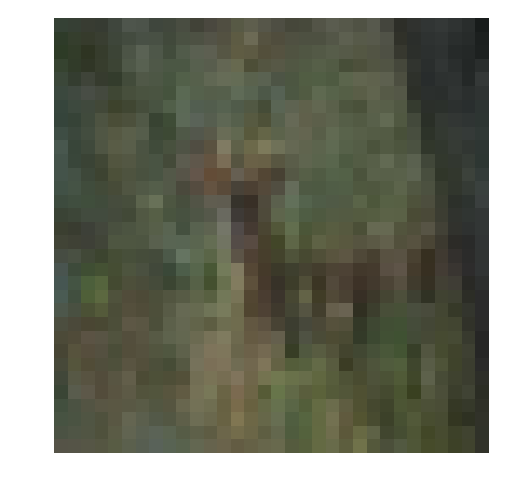

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 10
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [4]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [5]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit([0,1,2,3,4,5,6,7,8,9])

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    return encoder.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [5]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    #print([None,image_shape[0],image_shape[1],image_shape[2]])
    tf_shape = [None,image_shape[0],image_shape[1],image_shape[2]]
    return tf.placeholder(tf.float32, shape = tf_shape, name = 'x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    #print([None, n_classes])
    return tf.placeholder(tf.float32, shape = [None, n_classes], name = 'y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name = 'keep_prob') 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [6]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    #print(x_tensor.get_shape())
    #print(conv_num_outputs)
    #print(conv_ksize)
    #print(conv_strides)
    #print(pool_ksize)
    #print(pool_strides)

    output_depth  = conv_num_outputs
    input_depth   = x_tensor.get_shape()[3].value
    
    # weight & bias
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0],conv_ksize[1],input_depth,output_depth],mean=0.0, stddev=0.05, dtype=tf.float32))
    #print(weight.get_shape()) ##debug
    bias = tf.Variable(tf.truncated_normal([output_depth],mean=0.0, stddev=0.05, dtype=tf.float32))
    
    conv_strides    = [1, conv_strides[0], conv_strides[1], 1]
    maxpool_strides = [1, pool_strides[0], pool_strides[1], 1]
    maxpool_ksize   = [1, pool_ksize[0], pool_ksize[1], 1]
    
    # convolution
    conv = tf.nn.conv2d(x_tensor, weight, strides = conv_strides, padding = 'SAME')
    #print(conv.get_shape()) ##debug
    conv = tf.nn.bias_add(conv,bias)
    conv = tf.nn.relu(conv)
    
    #max pooling
    #print(conv.get_shape()) ##debug
    max_pool = tf.nn.max_pool(conv, ksize = maxpool_ksize, strides = maxpool_strides, padding = 'SAME')
    #print(max_pool.get_shape()) ##debug
    return max_pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [7]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    x_tensor_dim = x_tensor.get_shape().as_list()[1:]
    flattened_size = x_tensor_dim[0] * x_tensor_dim[1] * x_tensor_dim[2]   
    
    return tf.reshape(x_tensor, [-1, flattened_size])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [8]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    #print(x_tensor.get_shape())
    
    # weight & bias
    w = tf.Variable(tf.truncated_normal([x_tensor.get_shape()[1].value, num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
    bias = tf.Variable(tf.truncated_normal([num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
    
    fc = tf.add(tf.matmul(x_tensor,w),bias)
    
    return tf.nn.relu(fc)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [9]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    #print(x_tensor.get_shape()[1].value)
    
    # weight & bias
    weigth_out = tf.Variable(tf.truncated_normal([x_tensor.get_shape()[1].value, num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
    bias_out = tf.Variable(tf.truncated_normal([num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
    
    output_layer = tf.add(tf.matmul(x_tensor, weigth_out), bias_out)
    
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [32]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    conv_num_outputs = 32
    conv_ksize = [3,3]
    conv_strides = [1,1]
    pool_ksize = [3,3]
    pool_strides = [2,2]
    
    conv = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv = tf.nn.dropout(conv, keep_prob)
    
    conv_num_outputs = 64
    pool_strides = [1,1]
    conv = conv2d_maxpool(conv, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv = conv2d_maxpool(conv, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    conv = flatten(conv)
      
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:  
    num_outputs = 512
    fc = fully_conn(conv, num_outputs)
    
    num_outputs = 1024
    fc = fully_conn(conv, num_outputs)
    
    fc = tf.nn.dropout(fc, keep_prob)
    
    fc = fully_conn(fc, num_outputs)        
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    out = output(fc, 10)
    
    
    # TODO: return output
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [33]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    
    session.run(optimizer, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: keep_probability})

    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [34]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    test_valid_size = 256
    
    valid_loss = session.run(cost, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0})
    
    train_loss = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0})    
    
    train_acc = session.run(accuracy, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0})

    valid_acc = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0})    

    print('Validation Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
              valid_loss,valid_acc))
    print('Train Loss: {:>10.4f} Train Accuracy: {:.6f}'.format(
              train_loss,train_acc))
            
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [35]:
# TODO: Tune Parameters
epochs = 100
batch_size = 1024
keep_probability = 0.75

## HYPERPARAMETERS TEST HISTORY 
---
#### RUN 1
epochs = 100 batch_size = 512 keep_probability = 0.75

Epoch 100, CIFAR-10 Batch 1:  Validation Loss: 35216.7969 Validation Accuracy: 0.374400
Train Loss: 22322.4883 Train Accuracy: 0.476351

---
#### RUN 2
epochs = 128 batch_size = 512 keep_probability = 0.75

Epoch 128, CIFAR-10 Batch 1:  Validation Loss: 19870.6484 Validation Accuracy: 0.337200
Train Loss: 10584.4189 Train Accuracy: 0.472973

---
#### RUN 3
epochs = 100 batch_size = 1024 keep_probability = 0.75

Epoch 100, CIFAR-10 Batch 1:  Validation Loss: 84251.0312 Validation Accuracy: 0.393200
Train Loss: 61735.8125 Train Accuracy: 0.455446

---
#### RUN 4
epochs = 100 batch_size = 1024 keep_probability = 0.75

Epoch 128, CIFAR-10 Batch 1:  Validation Loss: 77022.4531 Validation Accuracy: 0.374200
Train Loss: 53328.5156 Train Accuracy: 0.455446

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Validation Loss:     2.2776 Validation Accuracy: 0.172000
Train Loss:     2.2790 Train Accuracy: 0.178218
Epoch  2, CIFAR-10 Batch 1:  Validation Loss:     2.0761 Validation Accuracy: 0.238000
Train Loss:     2.1014 Train Accuracy: 0.232673
Epoch  3, CIFAR-10 Batch 1:  Validation Loss:     2.0848 Validation Accuracy: 0.245200
Train Loss:     2.1180 Train Accuracy: 0.221535
Epoch  4, CIFAR-10 Batch 1:  Validation Loss:     2.0091 Validation Accuracy: 0.266400
Train Loss:     2.0670 Train Accuracy: 0.250000
Epoch  5, CIFAR-10 Batch 1:  Validation Loss:     1.9357 Validation Accuracy: 0.301200
Train Loss:     1.9885 Train Accuracy: 0.295792
Epoch  6, CIFAR-10 Batch 1:  Validation Loss:     1.8483 Validation Accuracy: 0.334400
Train Loss:     1.8969 Train Accuracy: 0.326733
Epoch  7, CIFAR-10 Batch 1:  Validation Loss:     1.7821 Validation Accuracy: 0.367200
Train Loss:     1.8213 Train Accuracy: 0.367574
Epoch  8, CI

Epoch 62, CIFAR-10 Batch 1:  Validation Loss:     2.0554 Validation Accuracy: 0.560000
Train Loss:     0.0508 Train Accuracy: 0.992574
Epoch 63, CIFAR-10 Batch 1:  Validation Loss:     1.9446 Validation Accuracy: 0.573400
Train Loss:     0.0467 Train Accuracy: 0.993812
Epoch 64, CIFAR-10 Batch 1:  Validation Loss:     1.9308 Validation Accuracy: 0.575600
Train Loss:     0.0560 Train Accuracy: 0.995049
Epoch 65, CIFAR-10 Batch 1:  Validation Loss:     2.0504 Validation Accuracy: 0.558400
Train Loss:     0.0881 Train Accuracy: 0.971535
Epoch 66, CIFAR-10 Batch 1:  Validation Loss:     2.1275 Validation Accuracy: 0.566600
Train Loss:     0.0769 Train Accuracy: 0.981436
Epoch 67, CIFAR-10 Batch 1:  Validation Loss:     2.1509 Validation Accuracy: 0.561400
Train Loss:     0.0530 Train Accuracy: 0.992574
Epoch 68, CIFAR-10 Batch 1:  Validation Loss:     2.2549 Validation Accuracy: 0.558400
Train Loss:     0.0630 Train Accuracy: 0.988861
Epoch 69, CIFAR-10 Batch 1:  Validation Loss:     2.074

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Validation Loss:     2.2763 Validation Accuracy: 0.140600
Train Loss:     2.2753 Train Accuracy: 0.152228
Epoch  1, CIFAR-10 Batch 2:  Validation Loss:     2.2141 Validation Accuracy: 0.174000
Train Loss:     2.2157 Train Accuracy: 0.164604
Epoch  1, CIFAR-10 Batch 3:  Validation Loss:     2.2561 Validation Accuracy: 0.161800
Train Loss:     2.2303 Train Accuracy: 0.165842
Epoch  1, CIFAR-10 Batch 4:  Validation Loss:     2.0969 Validation Accuracy: 0.234600
Train Loss:     2.0932 Train Accuracy: 0.228960
Epoch  1, CIFAR-10 Batch 5:  Validation Loss:     2.2429 Validation Accuracy: 0.210000
Train Loss:     2.2260 Train Accuracy: 0.212871
Epoch  2, CIFAR-10 Batch 1:  Validation Loss:     1.9189 Validation Accuracy: 0.308600
Train Loss:     1.9941 Train Accuracy: 0.300743
Epoch  2, CIFAR-10 Batch 2:  Validation Loss:     1.8979 Validation Accuracy: 0.314000
Train Loss:     1.8866 Train Accuracy: 0.330446
Epoch  2, CIFAR-10 Batch 3:  Validation Los

Epoch 13, CIFAR-10 Batch 2:  Validation Loss:     1.0056 Validation Accuracy: 0.655800
Train Loss:     0.7118 Train Accuracy: 0.754951
Epoch 13, CIFAR-10 Batch 3:  Validation Loss:     1.0896 Validation Accuracy: 0.636400
Train Loss:     0.7282 Train Accuracy: 0.740099
Epoch 13, CIFAR-10 Batch 4:  Validation Loss:     0.9685 Validation Accuracy: 0.666600
Train Loss:     0.6883 Train Accuracy: 0.757426
Epoch 13, CIFAR-10 Batch 5:  Validation Loss:     0.9521 Validation Accuracy: 0.671800
Train Loss:     0.6290 Train Accuracy: 0.793317
Epoch 14, CIFAR-10 Batch 1:  Validation Loss:     0.9790 Validation Accuracy: 0.672600
Train Loss:     0.6940 Train Accuracy: 0.758663
Epoch 14, CIFAR-10 Batch 2:  Validation Loss:     1.0694 Validation Accuracy: 0.639800
Train Loss:     0.7501 Train Accuracy: 0.740099
Epoch 14, CIFAR-10 Batch 3:  Validation Loss:     1.1131 Validation Accuracy: 0.635400
Train Loss:     0.7122 Train Accuracy: 0.747525
Epoch 14, CIFAR-10 Batch 4:  Validation Loss:     0.990

Epoch 25, CIFAR-10 Batch 3:  Validation Loss:     0.9716 Validation Accuracy: 0.695600
Train Loss:     0.2763 Train Accuracy: 0.904703
Epoch 25, CIFAR-10 Batch 4:  Validation Loss:     0.9795 Validation Accuracy: 0.705400
Train Loss:     0.2416 Train Accuracy: 0.917079
Epoch 25, CIFAR-10 Batch 5:  Validation Loss:     1.0453 Validation Accuracy: 0.688600
Train Loss:     0.2256 Train Accuracy: 0.926980
Epoch 26, CIFAR-10 Batch 1:  Validation Loss:     0.9737 Validation Accuracy: 0.702800
Train Loss:     0.2293 Train Accuracy: 0.934406
Epoch 26, CIFAR-10 Batch 2:  Validation Loss:     1.0878 Validation Accuracy: 0.682600
Train Loss:     0.3423 Train Accuracy: 0.877475
Epoch 26, CIFAR-10 Batch 3:  Validation Loss:     0.9711 Validation Accuracy: 0.706000
Train Loss:     0.2179 Train Accuracy: 0.933168
Epoch 26, CIFAR-10 Batch 4:  Validation Loss:     0.9348 Validation Accuracy: 0.709000
Train Loss:     0.1926 Train Accuracy: 0.946782
Epoch 26, CIFAR-10 Batch 5:  Validation Loss:     1.021

Epoch 37, CIFAR-10 Batch 4:  Validation Loss:     1.0743 Validation Accuracy: 0.720800
Train Loss:     0.0494 Train Accuracy: 0.988861
Epoch 37, CIFAR-10 Batch 5:  Validation Loss:     1.1705 Validation Accuracy: 0.712600
Train Loss:     0.0577 Train Accuracy: 0.992574
Epoch 38, CIFAR-10 Batch 1:  Validation Loss:     1.1945 Validation Accuracy: 0.714000
Train Loss:     0.0698 Train Accuracy: 0.985148
Epoch 38, CIFAR-10 Batch 2:  Validation Loss:     1.2178 Validation Accuracy: 0.709400
Train Loss:     0.0833 Train Accuracy: 0.975248
Epoch 38, CIFAR-10 Batch 3:  Validation Loss:     1.2053 Validation Accuracy: 0.703200
Train Loss:     0.0522 Train Accuracy: 0.987624
Epoch 38, CIFAR-10 Batch 4:  Validation Loss:     1.1366 Validation Accuracy: 0.719400
Train Loss:     0.0419 Train Accuracy: 0.991337
Epoch 38, CIFAR-10 Batch 5:  Validation Loss:     1.1689 Validation Accuracy: 0.710200
Train Loss:     0.0429 Train Accuracy: 0.995049
Epoch 39, CIFAR-10 Batch 1:  Validation Loss:     1.206

Epoch 49, CIFAR-10 Batch 5:  Validation Loss:     1.2723 Validation Accuracy: 0.710800
Train Loss:     0.0381 Train Accuracy: 0.991337
Epoch 50, CIFAR-10 Batch 1:  Validation Loss:     1.2746 Validation Accuracy: 0.715200
Train Loss:     0.0347 Train Accuracy: 0.992574
Epoch 50, CIFAR-10 Batch 2:  Validation Loss:     1.3732 Validation Accuracy: 0.700800
Train Loss:     0.0471 Train Accuracy: 0.988861
Epoch 50, CIFAR-10 Batch 3:  Validation Loss:     1.2857 Validation Accuracy: 0.696000
Train Loss:     0.0363 Train Accuracy: 0.992574
Epoch 50, CIFAR-10 Batch 4:  Validation Loss:     1.2366 Validation Accuracy: 0.712800
Train Loss:     0.0278 Train Accuracy: 0.996287
Epoch 50, CIFAR-10 Batch 5:  Validation Loss:     1.2457 Validation Accuracy: 0.713800
Train Loss:     0.0159 Train Accuracy: 0.998762
Epoch 51, CIFAR-10 Batch 1:  Validation Loss:     1.2714 Validation Accuracy: 0.717000
Train Loss:     0.0196 Train Accuracy: 1.000000
Epoch 51, CIFAR-10 Batch 2:  Validation Loss:     1.362

Epoch 62, CIFAR-10 Batch 1:  Validation Loss:     1.4897 Validation Accuracy: 0.723400
Train Loss:     0.0086 Train Accuracy: 0.998762
Epoch 62, CIFAR-10 Batch 2:  Validation Loss:     1.4049 Validation Accuracy: 0.733600
Train Loss:     0.0062 Train Accuracy: 1.000000
Epoch 62, CIFAR-10 Batch 3:  Validation Loss:     1.4868 Validation Accuracy: 0.717800
Train Loss:     0.0100 Train Accuracy: 0.998762
Epoch 62, CIFAR-10 Batch 4:  Validation Loss:     1.4248 Validation Accuracy: 0.718200
Train Loss:     0.0083 Train Accuracy: 0.998762
Epoch 62, CIFAR-10 Batch 5:  Validation Loss:     1.4915 Validation Accuracy: 0.719600
Train Loss:     0.0079 Train Accuracy: 0.998762
Epoch 63, CIFAR-10 Batch 1:  Validation Loss:     1.4929 Validation Accuracy: 0.723800
Train Loss:     0.0070 Train Accuracy: 1.000000
Epoch 63, CIFAR-10 Batch 2:  Validation Loss:     1.3986 Validation Accuracy: 0.730000
Train Loss:     0.0077 Train Accuracy: 0.998762
Epoch 63, CIFAR-10 Batch 3:  Validation Loss:     1.438

Epoch 74, CIFAR-10 Batch 2:  Validation Loss:     1.4220 Validation Accuracy: 0.728200
Train Loss:     0.0023 Train Accuracy: 1.000000
Epoch 74, CIFAR-10 Batch 3:  Validation Loss:     1.6124 Validation Accuracy: 0.704400
Train Loss:     0.0112 Train Accuracy: 0.995049
Epoch 74, CIFAR-10 Batch 4:  Validation Loss:     1.5124 Validation Accuracy: 0.716000
Train Loss:     0.0076 Train Accuracy: 0.998762
Epoch 74, CIFAR-10 Batch 5:  Validation Loss:     1.3883 Validation Accuracy: 0.731800
Train Loss:     0.0022 Train Accuracy: 1.000000
Epoch 75, CIFAR-10 Batch 1:  Validation Loss:     1.5829 Validation Accuracy: 0.714000
Train Loss:     0.0047 Train Accuracy: 1.000000
Epoch 75, CIFAR-10 Batch 2:  Validation Loss:     1.5139 Validation Accuracy: 0.731800
Train Loss:     0.0036 Train Accuracy: 1.000000
Epoch 75, CIFAR-10 Batch 3:  Validation Loss:     1.6248 Validation Accuracy: 0.713600
Train Loss:     0.0064 Train Accuracy: 0.998762
Epoch 75, CIFAR-10 Batch 4:  Validation Loss:     1.536

Epoch 86, CIFAR-10 Batch 3:  Validation Loss:     1.6473 Validation Accuracy: 0.712200
Train Loss:     0.0038 Train Accuracy: 1.000000
Epoch 86, CIFAR-10 Batch 4:  Validation Loss:     1.5905 Validation Accuracy: 0.718800
Train Loss:     0.0040 Train Accuracy: 1.000000
Epoch 86, CIFAR-10 Batch 5:  Validation Loss:     1.5695 Validation Accuracy: 0.729600
Train Loss:     0.0032 Train Accuracy: 1.000000
Epoch 87, CIFAR-10 Batch 1:  Validation Loss:     1.5552 Validation Accuracy: 0.724400
Train Loss:     0.0026 Train Accuracy: 1.000000
Epoch 87, CIFAR-10 Batch 2:  Validation Loss:     1.5302 Validation Accuracy: 0.719400
Train Loss:     0.0032 Train Accuracy: 1.000000
Epoch 87, CIFAR-10 Batch 3:  Validation Loss:     1.6197 Validation Accuracy: 0.721400
Train Loss:     0.0022 Train Accuracy: 1.000000
Epoch 87, CIFAR-10 Batch 4:  Validation Loss:     1.6438 Validation Accuracy: 0.712400
Train Loss:     0.0036 Train Accuracy: 1.000000
Epoch 87, CIFAR-10 Batch 5:  Validation Loss:     1.600

Epoch 98, CIFAR-10 Batch 4:  Validation Loss:     1.6614 Validation Accuracy: 0.721800
Train Loss:     0.0032 Train Accuracy: 0.998762
Epoch 98, CIFAR-10 Batch 5:  Validation Loss:     1.6515 Validation Accuracy: 0.724400
Train Loss:     0.0010 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 1:  Validation Loss:     1.6409 Validation Accuracy: 0.728200
Train Loss:     0.0007 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 2:  Validation Loss:     1.5958 Validation Accuracy: 0.725800
Train Loss:     0.0013 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 3:  Validation Loss:     1.6876 Validation Accuracy: 0.724600
Train Loss:     0.0014 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 4:  Validation Loss:     1.6376 Validation Accuracy: 0.726000
Train Loss:     0.0011 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 5:  Validation Loss:     1.7460 Validation Accuracy: 0.719200
Train Loss:     0.0026 Train Accuracy: 1.000000
Epoch 100, CIFAR-10 Batch 1:  Validation Loss:     1.70

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7221719563007355



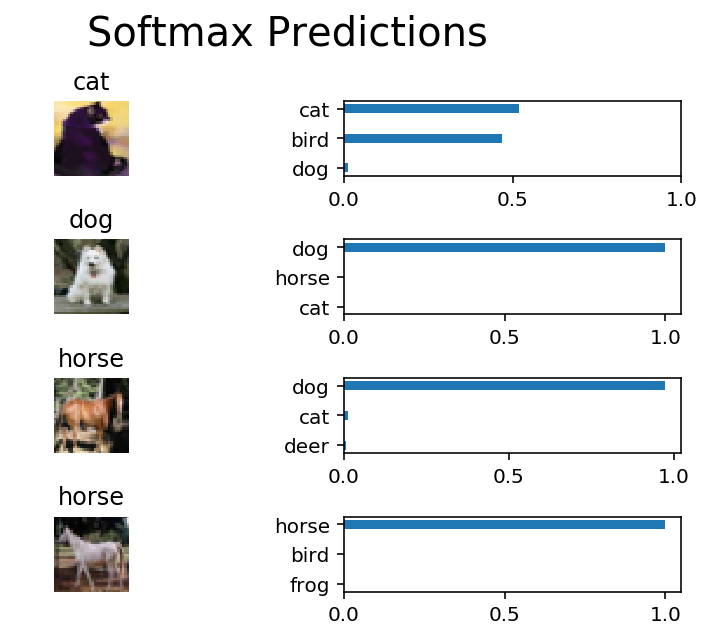

In [38]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.